## Materials and Concepts:
    - MNIST data
    - DataLoader, Transformers
    - Multilayer Neural Network, Activation Function
    - Loss and Optimizer
    - Training Loop (Batch Training)
    - Model Evaluation
    - GPU Support

In [11]:
"""import modules"""
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
"""Device Configuration"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
"""HyperParameters"""
input_size = 784 # 28*28 = 784 : images size
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [14]:
"""MNIST Dataset"""
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

In [15]:
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [16]:
"""DataLoader"""
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

One Training Batch Information:
Samples Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])


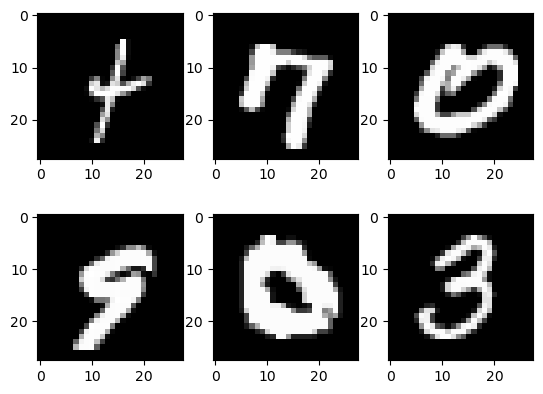

In [21]:
"""looking at one batch of the data: train sample"""
examples = iter(train_loader)
samples, labels = next(examples)
print("One Training Batch Information:\nSamples Shape: {}\nLabels Shape: {}".format(samples.shape,labels.shape))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

One Test Batch Information:
Samples Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])


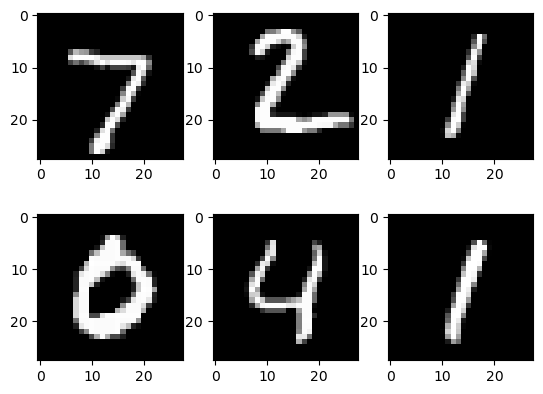

In [22]:
"""looking at one batch of the data: test sample"""
examples = iter(test_loader)
example_data, example_targets = next(examples)
print("One Test Batch Information:\nSamples Shape: {}\nLabels Shape: {}".format(example_data.shape,example_targets.shape))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

## Fully Connected Neural Network with One Hidden Layer

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        """
        Parameters
        ----------
        input_size: int
            number of input, input layers

        hidden_size: int
            number of hidden layers

        Outputs
        -------
        num_classes: number of outputs, number of output layers
        """
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) # first linear layer 
        self.relu = nn.ReLU() # activation function
        self.l2 = nn.Linear(hidden_size, num_classes) # output linear layer 
    
    def forward(self, x):
        """
        Parameters
        ----------
        x: inputs
        """
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [24]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [25]:
"""Loss and optimizer"""
criterion = nn.CrossEntropyLoss() # apply the softmax automatically
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
"""Train the Model: training loops"""
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.2048
Epoch [1/2], Step [200/600], Loss: 0.3007
Epoch [1/2], Step [300/600], Loss: 0.2026
Epoch [1/2], Step [400/600], Loss: 0.1950
Epoch [1/2], Step [500/600], Loss: 0.1346
Epoch [1/2], Step [600/600], Loss: 0.0994
Epoch [2/2], Step [100/600], Loss: 0.1352
Epoch [2/2], Step [200/600], Loss: 0.2571
Epoch [2/2], Step [300/600], Loss: 0.1232
Epoch [2/2], Step [400/600], Loss: 0.0381
Epoch [2/2], Step [500/600], Loss: 0.0781
Epoch [2/2], Step [600/600], Loss: 0.1730


In [27]:
"""
Test the model
In test phase, we don't need to compute gradients (for memory efficiency)
"""
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.16 %
